In [2]:
cd

/home/luxx0489


In [3]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import mne
from scipy.stats import circmean,circvar

#%matplotlib qt

In [86]:
ID_list = [6,7,8,9,10,12,13,14,16,17,18,19,20,21,22]
Freq_list = [43.43, 98.28]
#Noise_range_list = [[30,45],[85,100]]
output = np.empty((len(ID_list)*len(Freq_list),8))

# ID, reference(0 for ave, 1 for mastoid), frequency(43.43 and 98),
# single plv, linked mastoid plv, all chan plv, 
# single ITC, linked mastoid ITC, all chan ITC,
# single mag, linked mastoid mag, all chan mag,
# single T2, linked mastoid T2, all chan T2,
# tPCA, cPCA

row_num = 0

for iSubject in ID_list:# range(2,18):

    folder_path = "./jupyter_projects/MultiChannelSSSR/EEG_data_40_100_200Hz_LF/"
    sub_id = 'Sub' + str(iSubject) + '_LF'
    raw = mne.io.read_raw_bdf(folder_path + sub_id + '/' + sub_id + '_TMR0_MSK.bdf',
                                   stim_channel='Status', preload=True, exclude = ['EXG3','EXG4','EXG5','EXG6','EXG7','EXG8'])
    events = mne.find_events(raw)

    epochs = mne.Epochs(raw,events=events, tmin=-0.5, tmax=0.5)
    epochs.load_data()
    ep_a = epochs.copy().set_eeg_reference(ref_channels='average')
    

    data = ep_a.get_data()[:,:,int(np.round((0.5)*4096)):int(np.round((0.5+0.43752)*4096))]

            
    linked_mastoid = data[:,64:66,:].mean(1)
    diff_horizontal = data[:,64,:] - data[:,65,:]
    vertex_channel = (data[:,37,:] + data[:,46,:])/2
    refs = np.dstack((linked_mastoid,diff_horizontal,vertex_channel)).transpose(0,2,1)
    xw = np.fft.rfft(np.hamming(data.shape[2])*refs, axis=2)
    plv = abs((xw/abs(xw)).mean(0))
    phase = np.angle((xw/abs(xw)).mean(0))

    freq = np.fft.rfftfreq(data.shape[2],1/4096)

    for iFreq in range(len(Freq_list)):
        index = np.argmin(abs(freq-Freq_list[iFreq]))

        output[row_num,0] = iSubject
        output[row_num,1] = Freq_list[iFreq]
        output[row_num,2:5] = plv[:,index]
        output[row_num,5:8] = phase[:,index]

        row_num +=1

output_L = output

Extracting EDF parameters from /home/luxx0489/jupyter_projects/MultiChannelSSSR/EEG_data_40_100_200Hz_LF/Sub6_LF/Sub6_LF_TMR0_MSK.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3284991  =      0.000 ...   802.000 secs...
Trigger channel has a non-zero initial value of 130944 (consider using initial_event=True to detect this event)
1000 events found
Event IDs: [65409 65410]
1000 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 1000 events and 4097 original time points ...
0 bad epochs dropped
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.
Extracting EDF parameters from /home/luxx0489/jupyter_projects/MultiChannelSSSR/EEG_data_40_100_200Hz_LF/Sub7_LF/Sub7_LF_TMR0_MSK.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3284991  =      0.000 ..

BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3514367  =      0.000 ...   858.000 secs...
Trigger channel has a non-zero initial value of 130944 (consider using initial_event=True to detect this event)
1000 events found
Event IDs: [65409 65410]
1000 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 1000 events and 4097 original time points ...
0 bad epochs dropped
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.
Extracting EDF parameters from /home/luxx0489/jupyter_projects/MultiChannelSSSR/EEG_data_40_100_200Hz_LF/Sub20_LF/Sub20_LF_TMR0_MSK.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3547135  =      0.000 ...   866.000 secs...
Trigger channel has a non-zero initial value of 130944 (consider using initial_event=True to detect this event)
100

In [114]:
ID_list = [6,7,8,9,10,12,14,16,17,18,19,20,21,22]
Freq_list = [43.43, 233.13]

output = np.empty((len(ID_list)*len(Freq_list),8))
# ID, reference(0 for ave, 1 for mastoid), frequency(43.43 and 98), PLV*66 (64 channels+mastoid)


row_num = 0

for iSubject in ID_list:

    folder_path = "./jupyter_projects/MultiChannelSSSR/EEG_data_40_100_200Hz_HF/"
    sub_id = 'Sub' + str(iSubject) + '_HF'
    raw = mne.io.read_raw_bdf(folder_path + sub_id + '/' + sub_id + '_TMR0_MSK.bdf',
                                   stim_channel='Status', preload=True, exclude = ['EXG3','EXG4','EXG5','EXG6','EXG7','EXG8'])
    events = mne.find_events(raw)

    epochs = mne.Epochs(raw,events=events, tmin=-0.5, tmax=0.5)
    epochs.load_data()
    ep_a = epochs.copy().set_eeg_reference(ref_channels='average')
    

    data = ep_a.get_data()[:,:,int(np.round((0.5)*4096)):int(np.round((0.5+0.43752)*4096))]

            
    linked_mastoid = data[:,64:66,:].mean(1)
    diff_horizontal = data[:,64,:] - data[:,65,:]
    vertex_channel = (data[:,37,:] + data[:,46,:])/2
    refs = np.dstack((linked_mastoid,diff_horizontal,vertex_channel)).transpose(0,2,1)
    xw = np.fft.rfft(np.hamming(data.shape[2])*refs, axis=2)
    plv = abs((xw/abs(xw)).mean(0))
    phase = np.angle((xw/abs(xw)).mean(0))

    freq = np.fft.rfftfreq(data.shape[2],1/4096)

    for iFreq in range(len(Freq_list)):
        index = np.argmin(abs(freq-Freq_list[iFreq]))

        output[row_num,0] = iSubject
        output[row_num,1] = Freq_list[iFreq]
        output[row_num,2:5] = plv[:,index]
        output[row_num,5:8] = phase[:,index]

        row_num +=1

output_H = output

Extracting EDF parameters from /home/luxx0489/jupyter_projects/MultiChannelSSSR/EEG_data_40_100_200Hz_HF/Sub6_HF/Sub6_HF_TMR0_MSK.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3272703  =      0.000 ...   799.000 secs...
Trigger channel has a non-zero initial value of 130944 (consider using initial_event=True to detect this event)
1000 events found
Event IDs: [65409 65410]
1000 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 1000 events and 4097 original time points ...
0 bad epochs dropped
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.
Extracting EDF parameters from /home/luxx0489/jupyter_projects/MultiChannelSSSR/EEG_data_40_100_200Hz_HF/Sub7_HF/Sub7_HF_TMR0_MSK.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3354623  =      0.000 ..

BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3338239  =      0.000 ...   815.000 secs...
Trigger channel has a non-zero initial value of 130944 (consider using initial_event=True to detect this event)
1000 events found
Event IDs: [65409 65410]
1000 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 1000 events and 4097 original time points ...
0 bad epochs dropped
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.
Extracting EDF parameters from /home/luxx0489/jupyter_projects/MultiChannelSSSR/EEG_data_40_100_200Hz_HF/Sub21_HF/Sub21_HF_TMR0_MSK.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3244031  =      0.000 ...   792.000 secs...
Trigger channel has a non-zero initial value of 130944 (consider using initial_event=True to detect this event)
100

In [130]:
from scipy.stats import wilcoxon

In [133]:
ind = output_H[:,1] == 233.13
wilcoxon(output_H[ind,2],output_H[ind,4])

WilcoxonResult(statistic=18.0, pvalue=0.030327342511675306)

                  ID  (M1+M2)/2     M1-M2  (Fz+Fpz)/2
frequency                                            
43.43      14.133333   0.060106  0.035937    0.071374
98.28      14.133333   0.081568  0.044840    0.106961


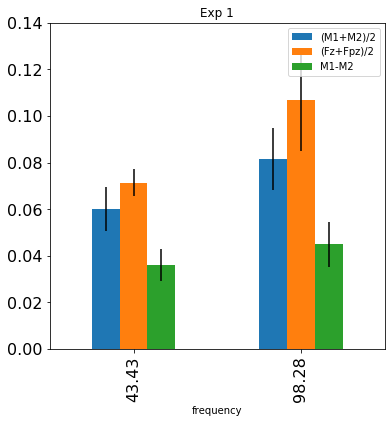

In [120]:
df = pd.DataFrame(output_L[:,0:5],columns=['ID','frequency']+ ['(M1+M2)/2','M1-M2','(Fz+Fpz)/2'])
df.head()

df_f = df
df_group = df_f.groupby(by=['frequency'])
df_avg = df_group.mean()
df_std = df_group.std()/np.sqrt(len(ID_list))
df_avg.drop(columns='ID')
print(df_avg)

p = df_avg[['(M1+M2)/2','(Fz+Fpz)/2','M1-M2']].plot(kind='bar',yerr=df_std,figsize = (6,6),fontsize=16,title='Exp 1',ylim=(0,0.14))

                  ID  (M1+M2)/2     M1-M2  (Fz+Fpz)/2
frequency                                            
43.43      14.214286   0.056104  0.036568    0.047024
233.13     14.214286   0.088228  0.036288    0.067252


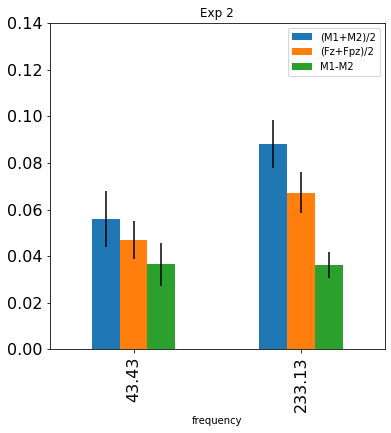

In [119]:
df = pd.DataFrame(output_H[:,0:5],columns=['ID','frequency']+ ['(M1+M2)/2','M1-M2','(Fz+Fpz)/2'])
df.head()

df_f = df
df_group = df_f.groupby(by=['frequency'])
df_avg = df_group.mean()
df_std = df_group.std()/np.sqrt(len(ID_list))
df_avg.drop(columns='ID')
print(df_avg)

p = df_avg[['(M1+M2)/2','(Fz+Fpz)/2','M1-M2']].plot(kind='bar',yerr=df_std,figsize = (6,6),fontsize=16,title='Exp 2',ylim=(0,0.14))

<BarContainer object of 2 artists>

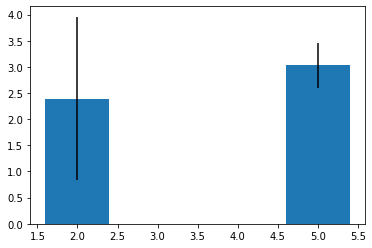

In [144]:

Freq_list = [43.43, 98.28]

output = output_L

ind = output[:,1] == 43.43
y1 = circmean(output[ind,5]-output[ind,7],np.pi*2,0)
e1 = circvar(output[ind,5]-output[ind,7],np.pi*2,0)
ind = output[:,1] == 98.28
y2 = circmean(output[ind,5]-output[ind,7],np.pi*2,0)
e2 = circvar(output[ind,5]-output[ind,7],np.pi*2,0)

plt.bar([2,5],[y1,y2],yerr=[e1,e2])

Text(0.5, 1.0, 'Phase delay between (M1+M2)/2 and (Fz+Fpz)/2')

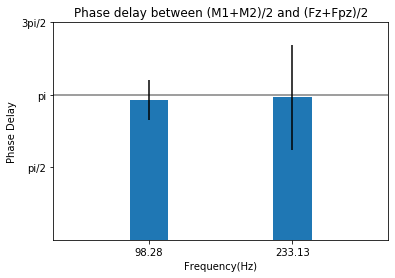

In [170]:

output = output_L

ind = output[:,1] == 98.28
y1 = circmean(output[ind,5]-output[ind,7],np.pi*2,0)
e1 = circvar(output[ind,5]-output[ind,7],np.pi*2,0)


output = output_H

ind = output[:,1] == 233.13
y2 = circmean(output[ind,5]-output[ind,7],0,np.pi*2)
e2 = circvar(output[ind,5]-output[ind,7],0,np.pi*2)

plt.bar([2,5],[y1,y2],yerr=[e1,e2])
plt.xticks([2,5],['98.28','233.13'])
plt.yticks([np.pi/2,np.pi,np.pi/2*3],['pi/2','pi','3pi/2'])
plt.xlabel('Frequency(Hz)')
plt.ylabel('Phase Delay')
plt.axhline(y=np.pi,color='k',alpha=0.5)
plt.xlim(0,7)
plt.title('Phase delay between (M1+M2)/2 and (Fz+Fpz)/2')

In [38]:
Target_list = [[34.28,43.43],[91.42,98.28]]
Noise_range_list = [[30,45],[85,100]]
Noise_index = []
for iFreq in range(2):
    index1 = np.argmin(abs(freq-Target_list[iFreq][0]))
    index2 = np.argmin(abs(freq-Target_list[iFreq][1]))
    Noise_range = np.arange(np.argmin(abs(freq-Noise_range_list[iFreq][0])),np.argmin(abs(freq-Noise_range_list[iFreq][1])))
    key1 = np.argwhere(Noise_range==index1)
    key2 = np.argwhere(Noise_range==index2)
    
    Noise_index.append(np.delete(Noise_range,[key1,key2]))
    

In [84]:

Target_list = [[34.28,43.43],[91.42,98.28]]
Noise_range_list = [[30,45],[85,100]]
Noise_index = []
for iFreq in range(2):
    index1 = np.argmin(abs(freq-Target_list[iFreq][0]))
    index2 = np.argmin(abs(freq-Target_list[iFreq][1]))
    Noise_range = np.arange(np.argmin(abs(freq-Noise_range_list[iFreq][0])),np.argmin(abs(freq-Noise_range_list[iFreq][1])))
    key1 = np.argwhere(Noise_range==index1)
    key2 = np.argwhere(Noise_range==index2)
    
    Noise_index.append(np.delete(Noise_range,[key1,key2]))
    

ID_list = [6,7,8,9,10,12,14,16,17,18,19,20,21,22]
Freq_list = [43.43, 98.28]
Noise_range_list = [[30,45],[85,100]]
output = np.empty((len(ID_list)*2*len(Freq_list),7))

# ID, reference(0 for ave, 1 for mastoid), frequency(43.43 and 98),
# all chan plv, 
# all chan ITC,
# all chan mag,
# all chan T2,
# tPCA, cPCA

row_num = 0

for iSubject in ID_list:# range(2,18):

    folder_path = "./jupyter_projects/MultiChannelSSSR/EEG_data_40_100_200Hz_LF/"
    sub_id = 'Sub' + str(iSubject) + '_LF'
    raw = mne.io.read_raw_bdf(folder_path + sub_id + '/' + sub_id + '_TMR0_MSK.bdf',
                                   stim_channel='Status', preload=True, exclude = ['EXG3','EXG4','EXG5','EXG6','EXG7','EXG8'])
    events = mne.find_events(raw)

    epochs = mne.Epochs(raw,events=events, tmin=-0.5, tmax=0.5)
    epochs.load_data()
    ep_m = epochs.copy().set_eeg_reference(ref_channels=['EXG1','EXG2'])
    ep_a = epochs.copy().set_eeg_reference(ref_channels='average')
    
    for iRef in range(2):
        if iRef==0:
            data = ep_a.get_data()[:,:,int(np.round((0.5)*4096)):int(np.round((0.5+0.43752)*4096))]
        else:
            data = ep_m.get_data()[:,:,int(np.round((0.5)*4096)):int(np.round((0.5+0.43752)*4096))]
            

        xw = np.fft.rfft(np.hamming(data.shape[2])*data, axis=2)
        plv = abs((xw/abs(xw)).mean(0))
        itc = abs(xw.mean(0))/(abs(xw).mean(0))
        mag = np.log(abs(xw).mean(0))

        plv_mean = plv[0:64,:].mean(0)
        itc_mean = itc[0:64,:].mean(0)
        mag_mean = mag[0:64,:].mean(0)
        freq = np.fft.rfftfreq(data.shape[2],1/4096)
        
        out = xw[:,0:64,:]
        sample_dat = np.concatenate((np.real(out),np.imag(out)),axis=1)

        T2 = np.zeros(sample_dat.shape[2])

        for iFreq in range(5,sample_dat.shape[2]-3):
            batch = sample_dat[:,:,iFreq].transpose(1,0)
            S_inv = np.linalg.inv(np.cov(batch))
            T2[iFreq]=batch.mean(1) @S_inv @batch.mean(1)
            
            
        for iFreq in range(len(Freq_list)):
            index = np.argmin(abs(freq-Freq_list[iFreq]))

            output[row_num,0] = iSubject
            output[row_num,1] = iRef
            output[row_num,2] = Freq_list[iFreq]
            output[row_num,3] = (plv_mean[index] - plv_mean[Noise_index[iFreq]].mean())/plv_mean[Noise_index[iFreq]].std()
            output[row_num,4] = (itc_mean[index] - itc_mean[Noise_index[iFreq]].mean())/itc_mean[Noise_index[iFreq]].std()
            output[row_num,5] = (mag_mean[index] - mag_mean[Noise_index[iFreq]].mean())/mag_mean[Noise_index[iFreq]].std()
            output[row_num,6] = (T2[index] - T2[Noise_index[iFreq]].mean())/T2[Noise_index[iFreq]].std()
            
            row_num +=1
        

Extracting EDF parameters from /home/luxx0489/jupyter_projects/MultiChannelSSSR/EEG_data_40_100_200Hz_LF/Sub6_LF/Sub6_LF_TMR0_MSK.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3284991  =      0.000 ...   802.000 secs...
Trigger channel has a non-zero initial value of 130944 (consider using initial_event=True to detect this event)
1000 events found
Event IDs: [65409 65410]
1000 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 1000 events and 4097 original time points ...
0 bad epochs dropped
EEG channel type selected for re-referencing
Applying a custom EEG reference.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.
Extracting EDF parameters from /home/luxx0489/jupyter_projects/MultiChannelSSSR/EEG_data_40_100_200Hz_LF/Sub7_LF/Sub7_LF_TMR0_MSK.bdf...
BDF file detected
Setting channel info stru

Extracting EDF parameters from /home/luxx0489/jupyter_projects/MultiChannelSSSR/EEG_data_40_100_200Hz_LF/Sub19_LF/Sub19_LF_TMR0_MSK.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3514367  =      0.000 ...   858.000 secs...
Trigger channel has a non-zero initial value of 130944 (consider using initial_event=True to detect this event)
1000 events found
Event IDs: [65409 65410]
1000 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 1000 events and 4097 original time points ...
0 bad epochs dropped
EEG channel type selected for re-referencing
Applying a custom EEG reference.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.
Extracting EDF parameters from /home/luxx0489/jupyter_projects/MultiChannelSSSR/EEG_data_40_100_200Hz_LF/Sub20_LF/Sub20_LF_TMR0_MSK.bdf...
BDF file detected
Setting channel info 

                                 ID       PLV       ITC       Mag        T2
frequency reference                                                        
43.43     average         14.214286  0.538709  0.611258 -1.309147  1.091382
          linked mastoid  14.214286  0.682751  0.616286 -1.229903  1.091382
98.28     average         14.214286  2.917832  1.807393 -1.821687  2.506908
          linked mastoid  14.214286  3.599380  1.962255 -1.732700  2.506908


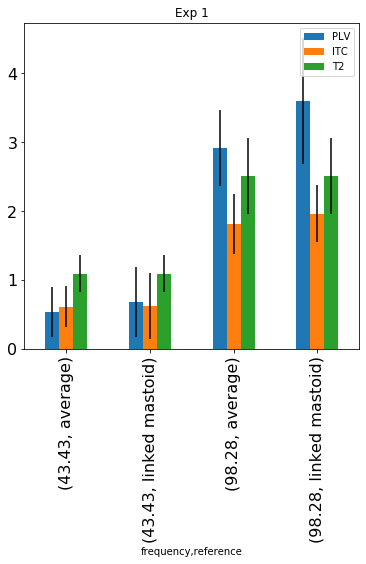

In [86]:
df = pd.DataFrame(output[:,0:7],columns=['ID','reference','frequency']+ ['PLV','ITC','Mag','T2'])
df.head()

dictionary = {0:'average',1:'linked mastoid'}

df_f = df.copy().replace({'reference':dictionary})

df_group = df_f.groupby(by=['frequency','reference'])
df_avg = df_group.mean()
df_std = df_group.std()/np.sqrt(len(ID_list))
df_avg.drop(columns='ID')
print(df_avg)

p = df_avg[['PLV','ITC','T2']].plot(kind='bar',yerr=df_std,figsize = (6,6),fontsize=16,title='Exp 1')

In [80]:

Target_list = [[34.28,43.43],[217.13,233.13]]
Noise_range_list = [[30,45],[210,235]]
Noise_index = []
for iFreq in range(2):
    index1 = np.argmin(abs(freq-Target_list[iFreq][0]))
    index2 = np.argmin(abs(freq-Target_list[iFreq][1]))
    Noise_range = np.arange(np.argmin(abs(freq-Noise_range_list[iFreq][0])),np.argmin(abs(freq-Noise_range_list[iFreq][1])))
    key1 = np.argwhere(Noise_range==index1)
    key2 = np.argwhere(Noise_range==index2)
    
    Noise_index.append(np.delete(Noise_range,[key1,key2]))
    

ID_list = [6,7,8,9,10,12,14,16,17,18,19,20,21,22]
Freq_list = [43.43, 233.13]
Noise_range_list = [[30,45],[85,100]]
output = np.empty((len(ID_list)*2*len(Freq_list),7))

# ID, reference(0 for ave, 1 for mastoid), frequency(43.43 and 98),
# all chan plv, 
# all chan ITC,
# all chan mag,
# all chan T2,
# tPCA, cPCA

row_num = 0

for iSubject in ID_list:# range(2,18):

    folder_path = "./jupyter_projects/MultiChannelSSSR/EEG_data_40_100_200Hz_HF/"
    sub_id = 'Sub' + str(iSubject) + '_HF'
    raw = mne.io.read_raw_bdf(folder_path + sub_id + '/' + sub_id + '_TMR0_MSK.bdf',
                                   stim_channel='Status', preload=True, exclude = ['EXG3','EXG4','EXG5','EXG6','EXG7','EXG8'])
    events = mne.find_events(raw)

    epochs = mne.Epochs(raw,events=events, tmin=-0.5, tmax=0.5)
    epochs.load_data()
    ep_m = epochs.copy().set_eeg_reference(ref_channels=['EXG1','EXG2'])
    ep_a = epochs.copy().set_eeg_reference(ref_channels='average')
    
    for iRef in range(2):
        if iRef==0:
            data = ep_a.get_data()[:,:,int(np.round((0.5)*4096)):int(np.round((0.5+0.43752)*4096))]
        else:
            data = ep_m.get_data()[:,:,int(np.round((0.5)*4096)):int(np.round((0.5+0.43752)*4096))]
            

        xw = np.fft.rfft(np.hamming(data.shape[2])*data, axis=2)
        plv = abs((xw/abs(xw)).mean(0))
        itc = abs(xw.mean(0))/(abs(xw).mean(0))
        mag = np.log(abs(xw).mean(0))

        plv_mean = plv[0:64,:].mean(0)
        itc_mean = itc[0:64,:].mean(0)
        mag_mean = mag[0:64,:].mean(0)
        freq = np.fft.rfftfreq(data.shape[2],1/4096)
        
        out = xw[:,0:64,:]
        sample_dat = np.concatenate((np.real(out),np.imag(out)),axis=1)

        T2 = np.zeros(sample_dat.shape[2])

        for iFreq in range(5,sample_dat.shape[2]-3):
            batch = sample_dat[:,:,iFreq].transpose(1,0)
            S_inv = np.linalg.inv(np.cov(batch))
            T2[iFreq]=batch.mean(1) @S_inv @batch.mean(1)
            
            
        for iFreq in range(len(Freq_list)):
            index = np.argmin(abs(freq-Freq_list[iFreq]))

            output[row_num,0] = iSubject
            output[row_num,1] = iRef
            output[row_num,2] = Freq_list[iFreq]
            output[row_num,3] = (plv_mean[index] - plv_mean[Noise_index[iFreq]].mean())/plv_mean[Noise_index[iFreq]].std()
            output[row_num,4] = (itc_mean[index] - itc_mean[Noise_index[iFreq]].mean())/itc_mean[Noise_index[iFreq]].std()
            output[row_num,5] = (mag_mean[index] - mag_mean[Noise_index[iFreq]].mean())/mag_mean[Noise_index[iFreq]].std()
            output[row_num,6] = (T2[index] - T2[Noise_index[iFreq]].mean())/T2[Noise_index[iFreq]].std()
            
            row_num +=1
        

Extracting EDF parameters from /home/luxx0489/jupyter_projects/MultiChannelSSSR/EEG_data_40_100_200Hz_HF/Sub6_HF/Sub6_HF_TMR0_MSK.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3272703  =      0.000 ...   799.000 secs...
Trigger channel has a non-zero initial value of 130944 (consider using initial_event=True to detect this event)
1000 events found
Event IDs: [65409 65410]
1000 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 1000 events and 4097 original time points ...
0 bad epochs dropped
EEG channel type selected for re-referencing
Applying a custom EEG reference.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.
Extracting EDF parameters from /home/luxx0489/jupyter_projects/MultiChannelSSSR/EEG_data_40_100_200Hz_HF/Sub7_HF/Sub7_HF_TMR0_MSK.bdf...
BDF file detected
Setting channel info stru

Extracting EDF parameters from /home/luxx0489/jupyter_projects/MultiChannelSSSR/EEG_data_40_100_200Hz_HF/Sub19_HF/Sub19_HF_TMR0_MSK.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3358719  =      0.000 ...   820.000 secs...
Trigger channel has a non-zero initial value of 130944 (consider using initial_event=True to detect this event)
1000 events found
Event IDs: [65409 65410]
1000 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 1000 events and 4097 original time points ...
0 bad epochs dropped
EEG channel type selected for re-referencing
Applying a custom EEG reference.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.
Extracting EDF parameters from /home/luxx0489/jupyter_projects/MultiChannelSSSR/EEG_data_40_100_200Hz_HF/Sub20_HF/Sub20_HF_TMR0_MSK.bdf...
BDF file detected
Setting channel info 

                                 ID       PLV       ITC       Mag        T2
frequency reference                                                        
43.43     average         14.214286  0.365481  0.142477 -1.236307  0.653918
          linked mastoid  14.214286  0.652786  0.403857 -1.124536  0.653918
233.13    average         14.214286  2.542221  2.352266 -1.423090  5.661164
          linked mastoid  14.214286  5.213965  4.527641 -1.393600  5.661164


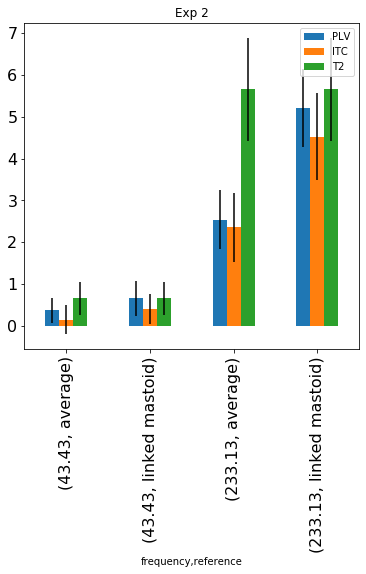

In [83]:
df = pd.DataFrame(output[:,0:7],columns=['ID','reference','frequency']+ ['PLV','ITC','Mag','T2'])
df.head()

dictionary = {0:'average',1:'linked mastoid'}

df_f = df.copy().replace({'reference':dictionary})

df_group = df_f.groupby(by=['frequency','reference'])
df_avg = df_group.mean()
df_std = df_group.std()/np.sqrt(len(ID_list))
df_avg.drop(columns='ID')
print(df_avg)

p = df_avg[['PLV','ITC','T2']].plot(kind='bar',yerr=df_std,figsize = (6,6),fontsize=16,title='Exp 2')